In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/refs/heads/master/Churn_Modelling.csv")
# or
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5431,5432,15582951,Crawford,696,France,Female,25,8,126442.59,1,1,0,121904.44,0
5823,5824,15573628,Greene,751,Germany,Female,51,7,148074.79,1,1,0,146411.41,1
4425,4426,15805523,Nnaife,717,France,Female,28,1,90537.16,1,0,1,74800.99,0
8619,8620,15661830,Lucciano,750,Spain,Female,36,6,0.00,2,1,1,59816.41,0
6532,6533,15732299,Boniwell,756,France,Male,67,4,0.00,3,1,1,93081.87,0


In [5]:
df.shape

(10000, 14)

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

data is imbalanced. we could have dealt with this problem, but we we decided to keep it as it is for now.

In [8]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Some imbalance here too.

In [9]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

here is somewhat balanced

In [10]:
# removing rownumber, surname and customerid
df.drop(columns=["RowNumber", "Surname", "CustomerId"], axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# creating dummies for the categorical columns i.e., Geography and Gender
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**We will do feature scaling before preparing model for the following reasons:**
1. Scaling leads to faster and more stable convergence during training.
2. Avoiding the Dominance of Larger Features.
3. Improved Performance for Some Activation Functions. If inputs are not scaled properly,<br> large inputs may push the activations into saturation (extremely close to 0 or 1), making the gradients very small (vanishing gradient problem).
4. Neural networks often initialize weights randomly. If the input data is not scaled, the weight updates during training can vary widely, <br> potentially leading to exploding or vanishing gradients, especially in deep networks. Scaling helps keep the weights in a more reasonable range.

In [14]:
x = df.drop(columns=['Exited'], axis = 1)
y = df['Exited']

In [15]:
# performing train_test_split before scaling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled.shape

(8000, 11)

In [18]:
# using Keras api to build a simple neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-09-30 23:52:31.541353: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 23:52:31.585117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-09-30 23:52:33.330723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /device:GPU:0 with 1736 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


True

In [20]:
# creating a Neural network with 11 input, 3 hidden layers and then output
model = Sequential()
model.add(Dense(3, input_dim=11, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

2024-09-30 23:52:33.356652: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1736 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
model.fit(x_train_scaled, y_train, epochs=12)

Epoch 1/12


2024-09-30 23:52:34.307460: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7b7684ed5c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-30 23:52:34.307494: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2024-09-30 23:52:34.311106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-30 23:52:34.324921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-09-30 23:52:34.437295: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.7063
Epoch 2/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7979
Epoch 3/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7984
Epoch 4/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7997
Epoch 5/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8034
Epoch 6/12
250/250 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8070
Epoch 7/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8085
Epoch 8/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8119
Epoch 9/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8123
Epoch 10/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8139
Epoch 11/1

So, Logloss = 0.42 and accuracy of model = 0.82

In [24]:
# extracting weights and biases of layer 0
wght, bs = model.layers[0].get_weights()

In [25]:
wght

array([[-0.11593463,  0.3075081 , -0.07934557],
       [-1.8194827 , -0.5846138 ,  0.53336734],
       [ 0.07940457,  0.17886318,  0.13093288],
       [-0.31190217, -0.4761795 , -0.32141903],
       [-0.32182723, -0.40283394, -1.6516151 ],
       [ 0.01262653,  0.18849619,  0.07044958],
       [ 0.44739386,  0.66865313, -0.64344794],
       [-0.04975207, -0.20348826, -0.15835471],
       [-0.13590288, -0.82633895,  0.39155066],
       [ 0.08140065, -0.11500602,  0.03490748],
       [ 0.13174333,  0.6023763 , -0.2785242 ]], dtype=float32)

In [26]:
bs

array([ 0.49155137,  0.547191  , -0.81757003], dtype=float32)

In [27]:
# similarly, for layer 1
model.layers[1].get_weights()

[array([[-1.6505576],
        [-1.1979917],
        [ 1.3016181]], dtype=float32),
 array([-0.41443703], dtype=float32)]

In [28]:
# making predictions
y_pred = model.predict(x_test_scaled)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.10989692],
       [0.14125925],
       [0.11869822],
       ...,
       [0.05039123],
       [0.12245146],
       [0.40661055]], dtype=float32)

values are in decimals because we are using sigmoid which returns values between 0 and 1

In [29]:
# using the threshold of 0.5
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8155

Making some changes in our Neural Network to improve accuracy. We can do this by different methods:
1. increasing the no. of epochs to 100 or more.
2. Using `ReLU` activation function generally improve the accuracy. ReLU generally leads to faster training compared to sigmoid and tanh because it mitigates the vanishing gradient problem and is computationally efficient.
3. Increasing the number of nodes in hidden layers.
4. Increase the number of hidden layer, but not too much as it creates overfitting.

In [31]:
# Increasing the number of epochs with ReLU, adding hidden layer and nodes in hidden layer

model2 = Sequential()
model2.add(Dense(11, input_dim=11, activation="relu")) # increasing the number of nodes in the hidden layer
model2.add(Dense(11, activation="relu")) # adding another hidden layer
model2.add(Dense(1, activation="sigmoid")) # keeping the output layer as sigmoid

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# increasing the number of epochs
# validation_split is used to split the data into train and validation so that we can validate our model at each epoch with validation data.
model2.fit(x_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 0.5603 - accuracy: 0.7461 - val_loss: 0.4704 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8000 - val_loss: 0.4299 - val_accuracy: 0.8075
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8175 - val_loss: 0.4188 - val_accuracy: 0.8194
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8255 - val_loss: 0.4110 - val_accuracy: 0.8194
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8328 - val_loss: 0.3997 - val_accuracy: 0.8269
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8367 - val_loss: 0.3872 - val_accuracy: 0.8419
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3839 - accuracy: 0.8462 - val_loss: 0.3764 - val_accuracy: 0.8487
Epoch 

1. We are getting `Training_loss`, `Training_accuracy`, `Validation_loss`, `Validation_accuracy` for each epoch.
2. It is important to note that both `training_accuracy` and `validation_accuracy` are increasing with each epoch. This means that our model is **not overfitting** the data.
> If only training_accuracy is increasing and validation_accuracy not increasing, then our model is overfitting on the data.

Still there is little overfitting if we see, training loss is less than validation loss & training accuracy is slightly more than validation accuracy.

In [35]:
y_pred2 = model2.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [36]:
# using the threshold of 0.5
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)

In [37]:
accuracy_score(y_test, y_pred2)

0.861

So, accuracy increased from 81% to 86%

In [41]:
# We can also plot the graph of loss and accuracy
history = model.fit(x_train_scaled, y_train, epochs=40, validation_split=0.2)

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8172 - val_loss: 0.4129 - val_accuracy: 0.8144
Epoch 2/40
200/200 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8178 - val_loss: 0.4112 - val_accuracy: 0.8175
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8191 - val_loss: 0.4094 - val_accuracy: 0.8175
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8202 - val_loss: 0.4076 - val_accuracy: 0.8163
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8208 - val_loss: 0.4059 - val_accuracy: 0.8169
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8227 - val_loss: 0.4041 - val_accuracy: 0.8194
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8228 - val_loss: 0.4024 - val_accuracy: 0.8213
Epoch 

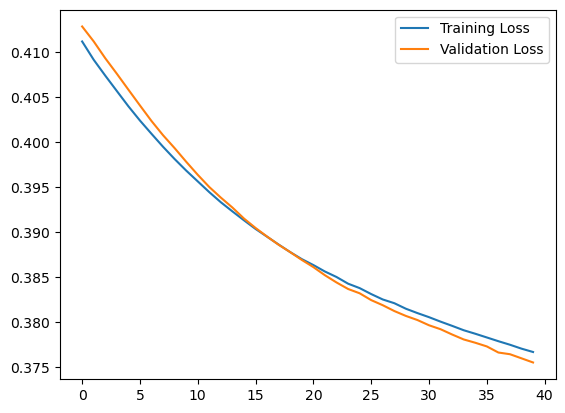

In [46]:
# plotting the graph
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

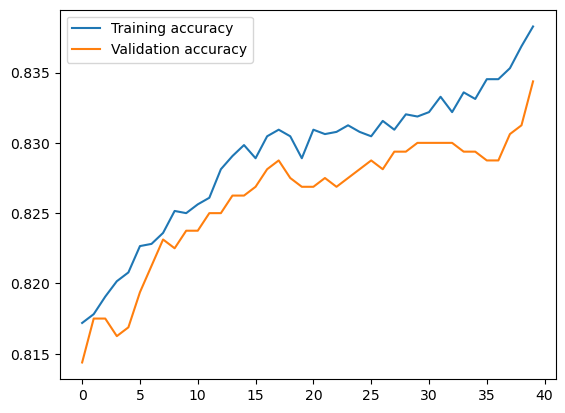

In [47]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()